NAME:PARIPOORNA D
ROLLNO:CB.EN.U4CSE20245

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
alpha=0.05
alpha

0.05

In [2]:
w_age=pd.read_csv("/content/test.csv")
w_age

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [3]:
#here we will take the required columns that is maternal age and maternal smoker
required_data=w_age[['Maternal Age', 'Maternal Smoker']]
required_data

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f413da42280>,
      dtype=object)

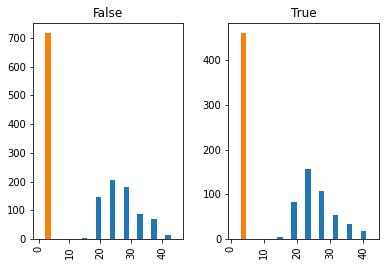

In [11]:
required_data.hist(by='Maternal Smoker')

In [6]:
#smokers age
smokers_age=w_age['Maternal Age'][w_age['Maternal Smoker']==True]
smokers_age


2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [7]:
#nonsmokers age
nonsmokers_age=w_age['Maternal Age'][w_age['Maternal Smoker']==False]
nonsmokers_age

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

**Histogram of smokers age distribution and non-smokers age distribution**

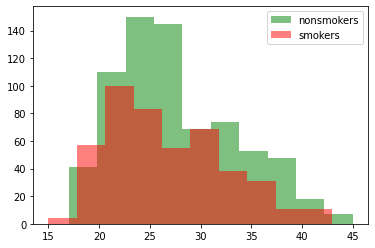

In [9]:
plt.hist(nonsmokers_age, color='g', label='nonsmokers', alpha=0.5)
plt.hist(smokers_age, color='r', label='smokers', alpha=0.5)
plt.legend()
plt.show()

As you see the average age of mothers who is smoking is less than the average age of the mothers who is not smoking

We have to check whether the differences is due to chance.

since we have to check whether the age of smokers and non-smokers is purely due to chance. 

so the Test statistic we would employ is the differences between the mean of smokers and non smokers age.


**Null hypothesis:** there is no differnce between the average age of smokers and non-smokers i.e The difference between the average age of mothers who is smoking and non-smoking is purely due to chance.

**Alternate Hypothesis:** The average age of smoking mothers is less than the average of the mothers who is non-smoking

we are going to employ the test statistic which is differences between the means of smokers age and non-smokers age

**Observed_Statistic**

In [12]:
mean_smokers_non_smokers=required_data.groupby(by='Maternal Smoker').mean()
mean_smokers_non_smokers

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [13]:
observed_statistic=mean_smokers_non_smokers['Maternal Age'][1]-mean_smokers_non_smokers['Maternal Age'][0]
observed_statistic

-0.8076725017901509

**Test statistic under the null**

In [14]:
#test_statistic one simulation
sampling=required_data.sample(1174, replace=False)
sampling

,Maternal Age,Maternal Smoker
290,25,True
357,31,False
147,21,False
503,25,False
285,24,False
...,...,...
785,26,False
1116,21,True
861,19,False
114,31,False


In [17]:
shuffled_age=sampling['Maternal Age']
shuffled_age

290     25
357     31
147     21
503     25
285     24
        ..
785     26
1116    21
861     19
114     31
394     19
Name: Maternal Age, Length: 1174, dtype: int64

In [18]:
#copying the sampled ages to a dataframe
#so that the dataframe contains both shuffled_age and maternal age
#inorder to find the test statistic
ori_and_shuff=required_data.assign(shuffled_age=shuffled_age.values)
ori_and_shuff

,Maternal Age,Maternal Smoker,shuffled_age
0,27,False,25
1,33,False,31
2,28,True,21
3,23,True,25
4,25,False,24
...,...,...,...
1169,27,False,26
1170,24,False,21
1171,30,True,19
1172,21,False,31


In [19]:
#finding the test statistic for one simulation
all_means=ori_and_shuff.groupby(by='Maternal Smoker').mean()
all_means

,Maternal Age,shuffled_age
Maternal Smoker,,
False,27.544056,27.225175
True,26.736383,27.233115


The above table consists of means of both maternal age and shuffled age calculated separetly for smokers and non_smokers

In [20]:
difference=all_means['shuffled_age'][0]-all_means['shuffled_age'][1]
difference

-0.007940643234761069

**Random permutations**
**5000 simulations** 

In [21]:
differences=np.zeros(5000)

In [22]:
simulations=5000
for i in range(simulations):
  sampling=required_data.sample(1174, replace=False)
  shuffled_age=sampling['Maternal Age']
  ori_and_shuff=required_data.assign(shuffled_age=shuffled_age.values)
  all_means=ori_and_shuff.groupby(by='Maternal Smoker').mean()
  new_difference=all_means['shuffled_age'][0]-all_means['shuffled_age'][1]
  differences[i]=new_difference

In [23]:
differences

array([-0.53021924, -0.25834819, -0.0472904 , ..., -0.64826851,
       -0.20468943, -0.24761644])

In [24]:
diff_df=pd.DataFrame(differences)
diff_df

,0
0,-0.530219
1,-0.258348
2,-0.047290
3,0.042141
4,-0.659000
...,...
4995,0.739705
4996,-0.498024
4997,-0.648269
4998,-0.204689


**Histogram to depicit the model of random selection** 

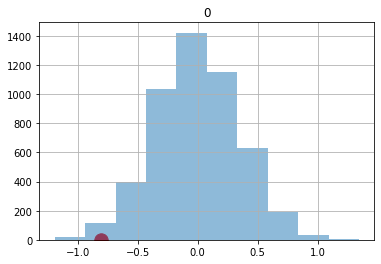

In [33]:
diff_df.hist(alpha=0.5)
plt.scatter(observed_statistic,0, color='r', s=180)
plt.show()

The histogram is mostly under the zero. the null hypothesis is under zero. The observed statistic is far away from the 0 and also see the observed statistic lies in the tail of the histogram. so this model supports alternate over the null hypothesis

**emprical p-value**

In [37]:
empirical_p_value=np.count_nonzero(differences<=observed_statistic)/5000
empirical_p_value

0.0108

**Outcome**

As you see the emprical_p_value is less than the significance level(alpha=0.05). so null hypothesis is rejected. Therefore the average age of mothers who smoked is less than the mothers who didnot smoke